<a href="https://colab.research.google.com/github/selfor21/NN-Models/blob/main/05_AutoEncoder_shallow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AUTOENCODER SHALLOW

The objective of this exercise is to evaluate the impact of the dimensionality in latent space. 




<img src="https://blog.keras.io/img/ae/autoencoder_schema.jpg">

https://blog.keras.io/building-autoencoders-in-keras.html

# 1- Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras.datasets as kds

import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA, PCA

# 2- MNIST Dataset

No Keras: https://keras.io/api/datasets/mnist/


<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">



In [2]:
num_classes = 10
input_shape = (28, 28, 1)

# Loading keras.datasets
(x_train, y_train), (x_test, y_test) = kds.mnist.load_data()

# Features Normalization
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


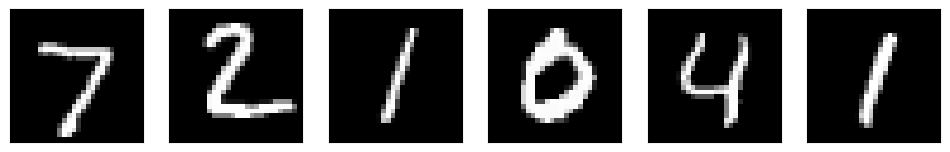

In [3]:
plt.figure(figsize=(12, 8))
for i in range(6):
    ax = plt.subplot(4, 6, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 03- Shallow AutoEncoder with Dense Layers



## 3.1- Dimensionality = 6

In [18]:
encoding_dim = 6

In [17]:
# Lists to save results of each model
test_loss_l = []
test_acc_l = []
model_l = []
history_l = []
params_l = []

In [19]:
input_img = keras.Input(shape=(784,))


In [23]:
encoded06 = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded06 = layers.Dense(784, activation='sigmoid')(encoded06)

autoencoder06 = keras.Model(input_img, decoded06)
autoencoder06.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 6)                 4710      
                                                                 
 dense_11 (Dense)            (None, 784)               5488      
                                                                 
Total params: 10,198
Trainable params: 10,198
Non-trainable params: 0
_________________________________________________________________


In [24]:
encoder06 = keras.Model(input_img, encoded06)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder06.layers[-1]
decoder06 = keras.Model(encoded_input, decoder_layer(encoded_input))

In [25]:

autoencoder06.compile(optimizer='adam', loss='binary_crossentropy')
history06 = autoencoder06.fit(x_train, x_train,
                            epochs=50,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test, x_test),
                            verbose=1) 






Epoch 1/50
235/235 [==============================] - 6s 6ms/step - loss: 0.3473 - val_loss: 0.2623
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2396 - val_loss: 0.2172
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2095 - val_loss: 0.2012
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1990 - val_loss: 0.1947
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1947 - val_loss: 0.1917
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1923 - val_loss: 0.1898
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1905 - val_loss: 0.1883
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1891 - val_loss: 0.1870
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1879 - val_loss: 0.1859
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1869 - val_loss: 0.1849

## 3.2- Dimensionality - 12

In [26]:
encoding_dim = 12
encoded12 = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded12 = layers.Dense(784, activation='sigmoid')(encoded12)

autoencoder12 = keras.Model(input_img, decoded12)
autoencoder12.summary()

encoder12 = keras.Model(input_img, encoded12)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder12.layers[-1]
decoder12 = keras.Model(encoded_input, decoder_layer(encoded_input))

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 12)                9420      
                                                                 
 dense_13 (Dense)            (None, 784)               10192     
                                                                 
Total params: 19,612
Trainable params: 19,612
Non-trainable params: 0
_________________________________________________________________


In [28]:
autoencoder12.compile(optimizer='adam', loss='binary_crossentropy')
history12 = autoencoder12.fit(x_train, x_train,
                            epochs=50,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test, x_test),
                            verbose=1) 

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.3203 - val_loss: 0.2328
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2105 - val_loss: 0.1917
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1822 - val_loss: 0.1720
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1684 - val_loss: 0.1631
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1620 - val_loss: 0.1589
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1587 - val_loss: 0.1563
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1567 - val_loss: 0.1546
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1550 - val_loss: 0.1531
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1537 - val_loss: 0.1519
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1525 - val_loss: 0.1509

## 3.3- Dimensionality = 24

In [29]:
encoding_dim = 24
encoded24 = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded24 = layers.Dense(784, activation='sigmoid')(encoded24)

autoencoder24 = keras.Model(input_img, decoded24)
autoencoder24.summary()

encoder24 = keras.Model(input_img, encoded24)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder24.layers[-1]
decoder24 = keras.Model(encoded_input, decoder_layer(encoded_input))

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 24)                18840     
                                                                 
 dense_15 (Dense)            (None, 784)               19600     
                                                                 
Total params: 38,440
Trainable params: 38,440
Non-trainable params: 0
_________________________________________________________________


In [30]:
autoencoder24.compile(optimizer='adam', loss='binary_crossentropy')
history24 = autoencoder24.fit(x_train, x_train,
                            epochs=50,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test, x_test),
                            verbose=1) 

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2893 - val_loss: 0.1998
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1810 - val_loss: 0.1645
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1557 - val_loss: 0.1451
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1400 - val_loss: 0.1328
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1298 - val_loss: 0.1246
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1234 - val_loss: 0.1197
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1194 - val_loss: 0.1164
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1164 - val_loss: 0.1136
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1139 - val_loss: 0.1113
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1118 - val_loss: 0.1093

## 3.4- Dimensionality = 32

In [31]:
encoding_dim = 32
encoded32 = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded32 = layers.Dense(784, activation='sigmoid')(encoded32)

autoencoder32 = keras.Model(input_img, decoded32)
autoencoder32.summary()

encoder32 = keras.Model(input_img, encoded32)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder32.layers[-1]
decoder32 = keras.Model(encoded_input, decoder_layer(encoded_input))

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 32)                25120     
                                                                 
 dense_17 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [32]:
autoencoder32.compile(optimizer='adam', loss='binary_crossentropy')
history32 = autoencoder32.fit(x_train, x_train,
                            epochs=50,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test, x_test),
                            verbose=1) 

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2753 - val_loss: 0.1887
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1716 - val_loss: 0.1549
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1452 - val_loss: 0.1342
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1289 - val_loss: 0.1218
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1186 - val_loss: 0.1135
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1117 - val_loss: 0.1079
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1067 - val_loss: 0.1036
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1030 - val_loss: 0.1004
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1002 - val_loss: 0.0978
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0981 - val_loss: 0.0960

# 04- Avaliation

In [35]:
decoded_imgs06 = autoencoder06.predict(x_test)
decoded_imgs12 = autoencoder12.predict(x_test)
decoded_imgs24 = autoencoder24.predict(x_test)
decoded_imgs32 = autoencoder32.predict(x_test)

313/313 [==============================] - 1s 2ms/step


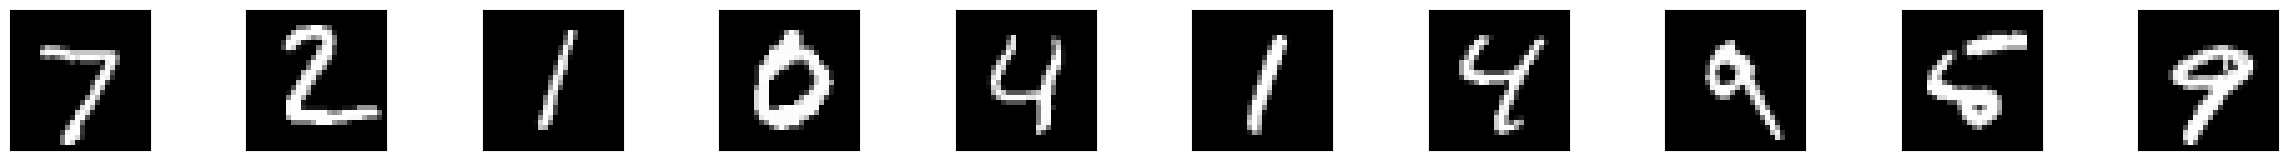

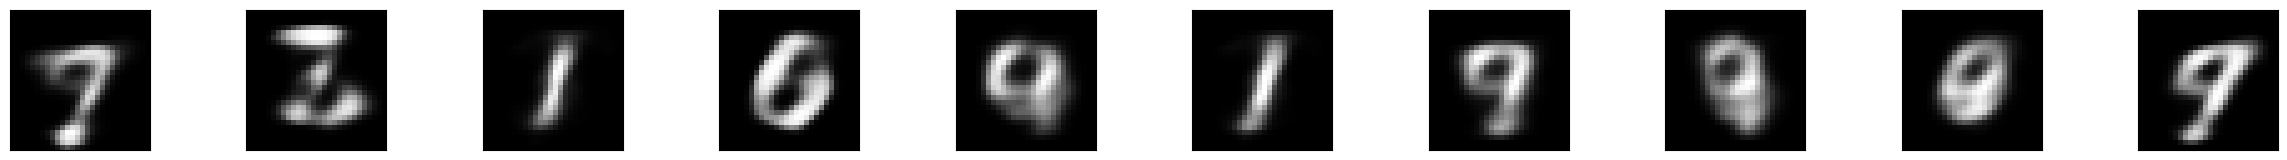

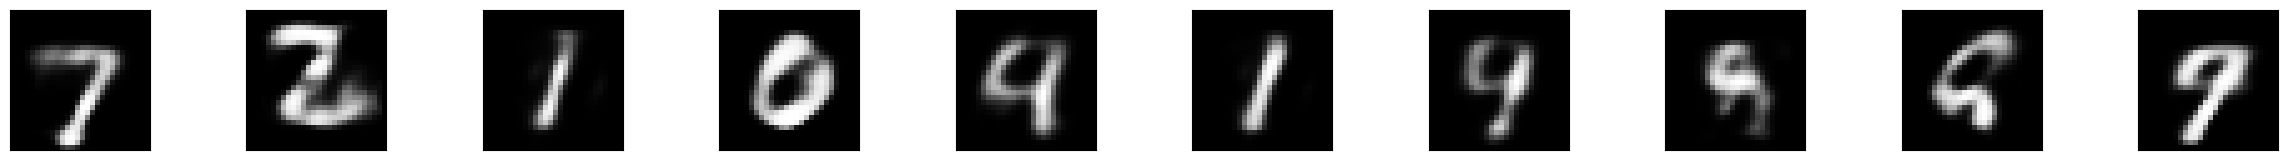

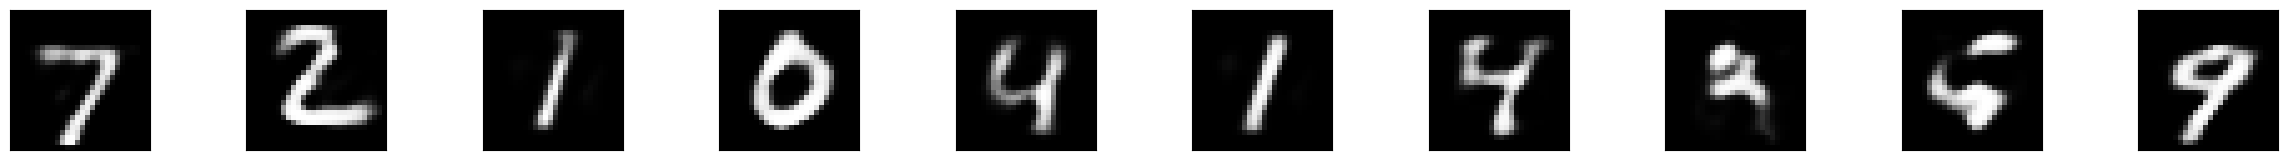

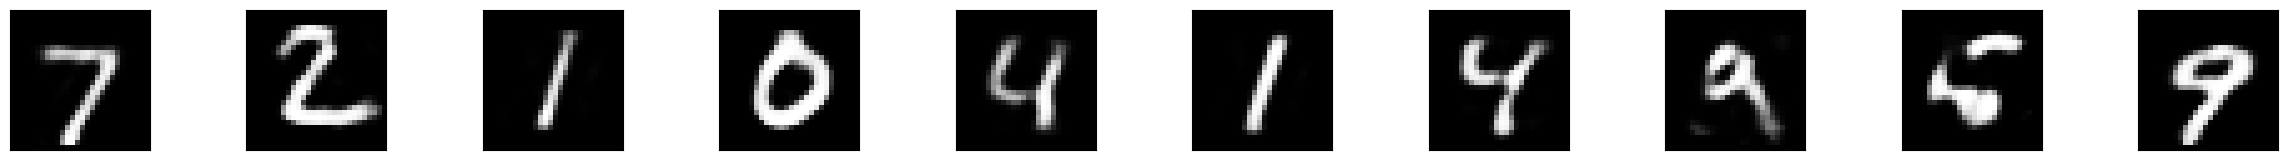

In [42]:
n = 10  # Imagens visualizadas
plt.figure(figsize=(30, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(30, 4))
for i in range(n):
    # Reconstruction dimensionality = 06
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs06[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(30, 4))
for i in range(n):
    # Reconstruction dimensionality = 12
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs12[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(30, 4))
for i in range(n):
    # Reconstruction dimensionality = 24
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs24[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(30, 4))
for i in range(n):
    # Reconstruction dimensionality = 32
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs32[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Digits with dimensionality = 32 performs better than other configurations.

## 4.1- PCA Projection

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

40/40 [==============================] - 0s 2ms/step


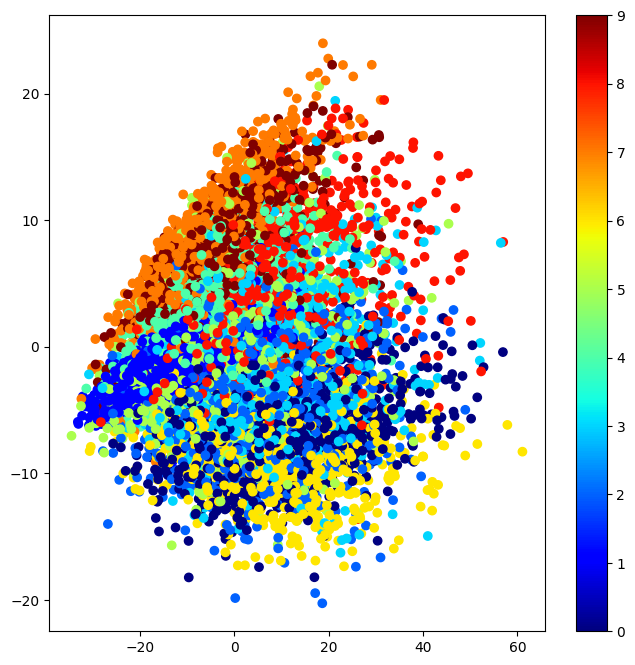

In [43]:
x_test_encoded = encoder32.predict(x_test, batch_size=256)

x_emb = PCA(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8, 8))
plt.scatter(x_emb[:, 0], x_emb[:, 1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

## 4.2- t-SNE Projection

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

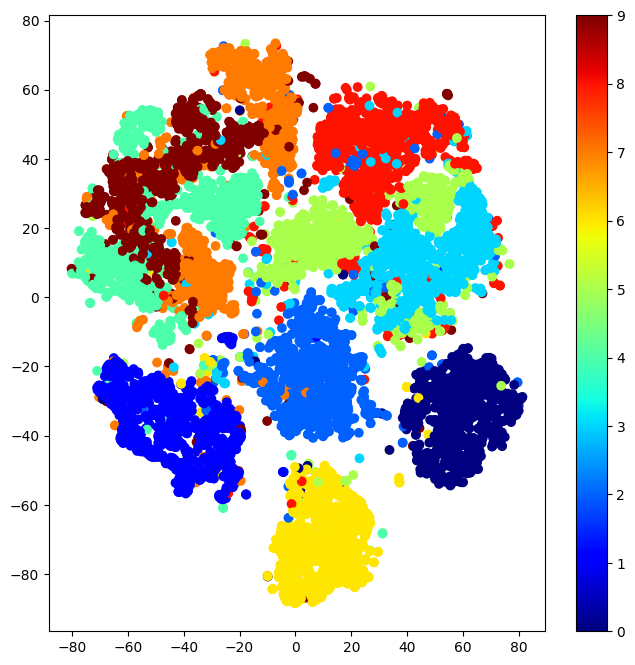

In [44]:
x_emb = TSNE(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8, 8))
plt.scatter(x_emb[:, 0], x_emb[:, 1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

# 05- Adding sparsity constrainty

In [49]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded32_r = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded32_r = layers.Dense(784, activation='sigmoid')(encoded32_r)

autoencoder32_r = keras.Model(input_img, decoded32_r)

In [50]:
encoder32_r = keras.Model(input_img, encoded32_r)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder32_r.layers[-1]
decoder32_r = keras.Model(encoded_input, decoder_layer(encoded_input))

In [51]:
autoencoder32_r.compile(optimizer='adam', loss='binary_crossentropy')
history32_r = autoencoder32_r.fit(x_train, x_train,
                            epochs=100,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test, x_test),
                            verbose=1) 

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2830 - val_loss: 0.1979
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1797 - val_loss: 0.1633
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1541 - val_loss: 0.1441
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1390 - val_loss: 0.1321
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1291 - val_loss: 0.1241
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1224 - val_loss: 0.1185
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1175 - val_loss: 0.1143
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1139 - val_loss: 0.1112
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1113 - val_loss: 0.1090
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1094 - val_lo

313/313 [==============================] - 1s 2ms/step


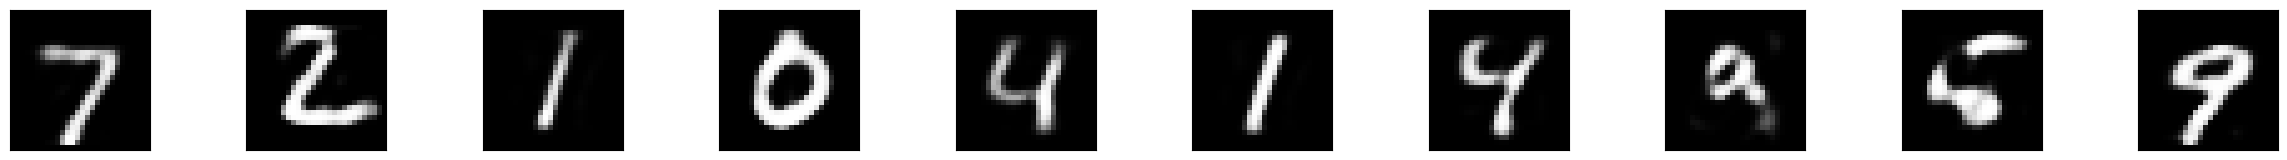

In [53]:
decoded_imgs32_r = autoencoder32_r.predict(x_test)

plt.figure(figsize=(30, 4))
for i in range(n):
    # Reconstruction dimensionality = 32 with sparsity constrainty
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs32_r[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()